# <a name="Librairies"></a> Importation des bibliothèques à utiliser

[Table des matières](#Table_des_matières)


In [1]:
import numpy as numpy
import pandas as panda
import matplotlib.pyplot as plot
import seaborn as sns

# Pour éviter d'avoir les messages warning
import warnings 
warnings.filterwarnings('ignore')

# Partie 1 - Importation et Nettoyage des Données
> ##  <a name="Fichier01"></a> Le Fichier ERP. (erp.xlsx)

> - Product_id: référence produit
> - onsale_web: en vente sur le site web
> - price: prix
> - stock_quantité : quantité en stock
> - stock_status : le statut du stock (instock or outofstock)

[Table des matières](#Table_des_matières)


> #### Lecture Fichier et Affichage des 8 premières données

In [2]:
# Variable du répertoire d'installation
repertoireFichierImportation = "F:/35. Projet 05/01. Les données/"
# variable pour le nom du fichier à impoter
nomFicherImportation = "erp.xlsx"
# Importer les données du fichiers dans le Dataframe aideAlimentaire
fichierErp = panda.read_excel(
    repertoireFichierImportation + nomFicherImportation)
# Afficher les 8 premières lignes
fichierErp.head(8)

,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock
5,4040,1,34.3,0,outofstock
6,4041,1,32.7,15,instock
7,4042,1,31.2,34,instock


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [3]:
#Afficher les infos du Dataframe
fichierErp.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", fichierErp.shape[0], "Lignes et",fichierErp.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB

Le fichier contient 825 Lignes et 5 Colonnes


> #### Nb de Doublons et filtre sur les ventes en ligne uniquement

In [4]:
# Trouver le nombre des doublons en filtrant sur la colonnes product_id
doublon = fichierErp.duplicated(['product_id']).sum()
print("Le nombre de doublon dans la colonne (product_id) est de", doublon)
print("")
# Filtrer sur les ventes web uniquement
fichierErp = fichierErp.loc[(fichierErp['onsale_web'] != 0), :]
print("Le fichier contient",
      fichierErp.shape[0], "Lignes et", fichierErp.shape[1], "Colonnes")

Le nombre de doublon dans la colonne (product_id) est de 0

Le fichier contient 717 Lignes et 5 Colonnes


> ## <a name="Fichier02"></a> Le Fichier Web. (web.xlsx)

>> - sku : Identifiants produit à renommer en id_web. Apparait en double pour chaque article
>> - virtual : remplit uniquement de 0 --> à Supprimer
>> - downloadable : remplit uniquement de 0 --> à Supprimer
>> - rating_count : remplit uniquement de 0 --> à Supprimer
>> - average_rating : remplit uniquement de 0 --> à Supprimer
>> - total_sales : Nombre de Vente
>> - tax_status : égale à taxable quand post_mime = Product
>> - tax_class : remplit uniquement de 0 --> à Supprimer
>> - post_author : égale à 2 partout sauf pour le bon cadeau : A Supprimer
>> - post_date : Date de la vente à supprimer
>> - post_date_gmt : heure GMT à supprimer
>> - post_content : remplit uniquement de 0 --> à Supprimer
>> - post_title : Nom de l'article
>> - post_excerpt : commentaire sur l'article
>> - post_status : uniquement en statut publish : à Suppimer
>> - comment_status : uniquement en statut closed : à Supprimer
>> - ping_status : : uniquement en statut closed : à Supprimer
>> - post_password : remplit uniquement de 0 --> à Supprimer
>> - post_name : Quasi pareil que post-tittle -- > voir utilité pour le garder
>> - post_modified : modification fiche article -- > Voir utilité pour le garder
>> - post_modified_gmt : heure GMT :  a supprimer
>> - post_content_filtered : remplit uniquement de 0 --> à Supprimer
>> - post_parent : remplit uniquement de 0 --> à Supprimer
>> - guid : adresse web de l'article et adresse web de l'image de l'article : A Supprimer
>> - menu_order : remplit uniquement de 0 --> à Supprimer
>> - post_type : permet de signaler une pièce jointe si = attachement
>> - post_mime_type : Si pièce jointe alors type de pièce jointe : uniquement image/jpg : A Supprimer
>> - comment_count: remplit uniquement de 0 --> à Supprimer

[Table des matières](#Table_des_matières)


> #### Lecture Fichier et Affichage des 8 premières données

In [5]:
# variable pour le nom du fichier à impoter
nomFicherImportation = "web.xlsx"
# Importer les données du fichiers
fichierWeb = panda.read_excel(
    repertoireFichierImportation + nomFicherImportation)
# Afficher le dataframe
fichierWeb.head(3)
print("Le fichier contient",
      fichierWeb.shape[0], "Lignes et", fichierWeb.shape[1], "Colonnes")

Le fichier contient 1513 Lignes et 28 Colonnes


> #### Modification des données

In [6]:
# Remplacer le nom de la colonne SKU par id_web
fichierWeb = fichierWeb.rename(columns={'sku': 'id_web'})
# Suppression des colonnes vides (qui ne contiennent pas de données)
listeColonneASupprimer = ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_class', 'post_content', 'post_status',
                          'comment_status', 'ping_status', 'post_password', 'post_content_filtered', 'post_parent', 'menu_order',
                          'comment_count', 'post_date_gmt', 'post_modified_gmt', 'post_author', 'guid', 'post_mime_type', 'post_date',
                          'post_modified']
fichierWeb = fichierWeb.drop(listeColonneASupprimer, axis=1)
fichierWeb.head(5)

,id_web,total_sales,tax_status,post_title,post_excerpt,post_name,post_type
0,bon-cadeau-25-euros,10.0,taxable,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros,product
1,15298,6.0,taxable,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,product
2,15296,0.0,taxable,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,product
3,15300,0.0,taxable,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,product
4,19814,3.0,taxable,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,product


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [7]:
# Information sur le dataFrame,notamment le type d'index et les colonnes,les valeurs non nulles et l'utilisation de la mémoire.
fichierWeb.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", fichierWeb.shape[0], "Lignes et",fichierWeb.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_web        1428 non-null   object 
 1   total_sales   1430 non-null   float64
 2   tax_status    716 non-null    object 
 3   post_title    1430 non-null   object 
 4   post_excerpt  716 non-null    object 
 5   post_name     1430 non-null   object 
 6   post_type     1430 non-null   object 
dtypes: float64(1), object(6)
memory usage: 82.9+ KB

Le fichier contient 1513 Lignes et 7 Colonnes


> #### Nb de Doublons et Nb de Valeurs Manquantes 

In [8]:
# Trouver le nombre des doublons en filtrant sur les 2 premières colonnes
doublon = fichierWeb.duplicated(['id_web']).sum()
print("Le nombre de doublon dans cette table est de" , doublon)
print("")
# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
fichierWeb.isna().sum()

Le nombre de doublon dans cette table est de 798

Le nombre de valeur manquante par colonne dans cette table est de


id_web           85
total_sales      83
tax_status      797
post_title       83
post_excerpt    797
post_name        83
post_type        83
dtype: int64

In [9]:
#trier les données
fichierWeb.sort_values(by=["post_title"], ascending=True).head(10)

,id_web,total_sales,tax_status,post_title,post_excerpt,post_name,post_type
610,15325,4.0,taxable,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",agnes-levet-amethyste-2017,product
1381,15325,4.0,NaN,Agnès Levet Côte Rôtie Améthyste 2017,NaN,agnes-levet-amethyste-2017,attachment
611,15328,3.0,taxable,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",agnes-levet-cote-rotie-maestria-2017,product
1382,15328,3.0,NaN,Agnès Levet Côte Rôtie Maestria 2017,NaN,agnes-levet-cote-rotie-maestria-2017,attachment
612,15329,3.0,taxable,Agnès Levet Côte Rôtie Péroline 2017,"<span style=""float: none; background-color: tr...",agnes-levet-cote-rotie-peroline-2017,product
1383,15329,3.0,NaN,Agnès Levet Côte Rôtie Péroline 2017,NaN,agnes-levet-cote-rotie-peroline-2017,attachment
1191,15530,10.0,NaN,Alain Graillot Crozes-Hermitage Blanc 2018,NaN,alain-graillot-crozes-hermitage-blanc-2018,attachment
412,15530,10.0,taxable,Alain Graillot Crozes-Hermitage Blanc 2018,Issu de faible rendements comme pour l’ensembl...,alain-graillot-crozes-hermitage-blanc-2018,product
411,15531,6.0,taxable,Alain Graillot Crozes-Hermitage Rouge 2017,Cette très belle et très séduisante cuvée Croz...,alain-graillot-crozes-hermitage-rouge-2017,product
1190,15531,6.0,NaN,Alain Graillot Crozes-Hermitage Rouge 2017,NaN,alain-graillot-crozes-hermitage-rouge-2017,attachment


In [10]:
# Filtrer sur les données ou Post_type = product
fichierWeb = fichierWeb.loc[(fichierWeb['post_type'] == "product" ),:]
fichierWeb.sort_values(by=["post_title"], ascending=True).head(10)

,id_web,total_sales,tax_status,post_title,post_excerpt,post_name,post_type
610,15325,4.0,taxable,Agnès Levet Côte Rôtie Améthyste 2017,"<span style=""float: none;background-color: tra...",agnes-levet-amethyste-2017,product
611,15328,3.0,taxable,Agnès Levet Côte Rôtie Maestria 2017,"<span style=""float: none; background-color: tr...",agnes-levet-cote-rotie-maestria-2017,product
612,15329,3.0,taxable,Agnès Levet Côte Rôtie Péroline 2017,"<span style=""float: none; background-color: tr...",agnes-levet-cote-rotie-peroline-2017,product
412,15530,10.0,taxable,Alain Graillot Crozes-Hermitage Blanc 2018,Issu de faible rendements comme pour l’ensembl...,alain-graillot-crozes-hermitage-blanc-2018,product
411,15531,6.0,taxable,Alain Graillot Crozes-Hermitage Rouge 2017,Cette très belle et très séduisante cuvée Croz...,alain-graillot-crozes-hermitage-rouge-2017,product
410,15533,24.0,taxable,Alain Graillot Crozes-Hermitage Rouge La Guira...,3 bouteilles maximum par client\n\nUne belle p...,alain-graillot-crozes-hermitage-rouge-la-guira...,product
538,14855,6.0,taxable,Albert Boxler Chasselas 2016,"Cépage réputé modeste, mais cela donne entre l...",albert-boxler-chasselas-2016,product
539,14856,3.0,taxable,Albert Boxler Crémant d'Alsace Brut 2014,Un superbe crémant doté d'une bulle fine et ch...,albert-boxler-cremant-2014,product
540,15923,0.0,taxable,Albert Boxler Pinot Gris Grand Cru Sommerberg ...,"Le Pinot Gris Grand Cru Sommerberg W 2016, du ...",albert-boxler-pinot-gris-sommerberg-w-2016,product
542,14844,3.0,taxable,Albert Boxler Pinot Gris Réserve 2016,Ce Pinot Gris Réserve provient d’un savant ass...,albert-boxler-pinot-gris-reserve-2016,product


In [11]:
# Trouver le nombre des doublons en filtrant sur les 2 premières colonnes
doublon = fichierWeb.duplicated(['id_web']).sum()
print("Le nombre de doublon dans cette table est de" , doublon)
print("")
# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
fichierWeb.isna().sum()
print("Le fichier contient", fichierWeb.shape[0], "Lignes et",fichierWeb.shape[1], "Colonnes" )

Le nombre de doublon dans cette table est de 1

Le nombre de valeur manquante par colonne dans cette table est de
Le fichier contient 716 Lignes et 7 Colonnes


> #### Suppression des valeurs (Not a Number)

In [12]:
# Affichier les lignes qui ont des Nan
listeNan = fichierWeb[fichierWeb.isna().any(axis=1)]
listeNan.head()

,id_web,total_sales,tax_status,post_title,post_excerpt,post_name,post_type
470,NaN,0.0,taxable,Pierre Jean Villa Côte Rôtie Fongeant 2017,"Fongeant 2017 explose sur un fruit brillant, p...",pierre-jean-villa-cote-rotie-fongeant-2017,product
471,NaN,0.0,taxable,Pierre Jean Villa Condrieu Jardin Suspendu 2018,"<span id=""u1194-83"">Le nez séduit par ses parf...",pierre-jean-villa-condrieu-suspendu-2018,product


In [13]:
# Supprimer les lignes dont l'id_web' est manquant
fichierWeb = fichierWeb.dropna(axis=0, how='any', subset=['id_web'])
print("Le fichier contient", fichierWeb.shape[0], "Lignes et",fichierWeb.shape[1], "Colonnes" )

Le fichier contient 714 Lignes et 7 Colonnes


In [14]:
#Suppression de la colonne taxable
doublonTs = fichierWeb.duplicated(['tax_status']).sum()
doublonPt = fichierWeb.duplicated(['post_type']).sum()
print("Le nombre de doublon dans la colonne (post_title) est de" , doublonTs,
      "et le nombre de doublon dans la colonne (post_type) est de", doublonPt, 
      "suppression des ces deux colonnes")
print("")
fichierWeb = fichierWeb.drop(columns=['tax_status', 'post_type'])
print("Le fichier contient", fichierWeb.shape[0], "Lignes et",fichierWeb.shape[1], "Colonnes" )

Le nombre de doublon dans la colonne (post_title) est de 713 et le nombre de doublon dans la colonne (post_type) est de 713 suppression des ces deux colonnes

Le fichier contient 714 Lignes et 5 Colonnes


In [15]:
fichierWeb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 798
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id_web        714 non-null    object 
 1   total_sales   714 non-null    float64
 2   post_title    714 non-null    object 
 3   post_excerpt  714 non-null    object 
 4   post_name     714 non-null    object 
dtypes: float64(1), object(4)
memory usage: 33.5+ KB


In [16]:
fichierWeb.head()

,id_web,total_sales,post_title,post_excerpt,post_name
0,bon-cadeau-25-euros,10.0,Bon cadeau de 25€,"<span style=""color: #a85253;""><strong>Parlons ...",bon-cadeau-de-25-euros
1,15298,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018
2,15296,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017
3,15300,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...
4,19814,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018


> ## <a name="Fichier03"></a> Le Fichier Liaision. (liaison.xlsx)

>> - product_id
>> - id_web

[Table des matières](#Table_des_matières)

> #### Lecture Fichier et Affichage des 8 premières données

In [17]:
#variable pour le nom du fichier à impoter
nomFicherImportation = "liaison.xlsx"
# Importer les données du fichiers ()
fichierLiaison = panda.read_excel(repertoireFichierImportation + nomFicherImportation)
# Afficher le dataframe
fichierLiaison.head(8) 

,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815
5,4040,15303
6,4041,14975
7,4042,16042


> #### Types de données et Nombre de Lignes et de Colonnes du fichier

In [18]:
# Information sur le dataFrame,notamment le type d'index et les colonnes,les valeurs non nulles et l'utilisation de la mémoire.
fichierLiaison.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", fichierLiaison.shape[0], "Lignes et",fichierLiaison.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB

Le fichier contient 825 Lignes et 2 Colonnes


> #### Modifications des données

In [19]:
# Changer le type  de données de la colonne product_id
fichierLiaison['product_id']= fichierLiaison['product_id'].astype(object)

> #### Nb de Doublons et Nb de Valeurs Manquantes 

In [20]:
# Trouver le nombre des doublons en filtrant sur les 2 premières colonnes
doublonP = fichierLiaison.duplicated(['product_id']).sum()
doublonId = fichierLiaison.duplicated(['id_web']).sum()
print("Le nombre de doublon dans dans la colonne (product_id) est de" , doublonP, "\n"
      "et le nombre de doublon dans la colonne (id_wev) est de", doublonId)
print("")
# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
fichierLiaison.isna().sum()


Le nombre de doublon dans dans la colonne (product_id) est de 0 
et le nombre de doublon dans la colonne (id_wev) est de 90

Le nombre de valeur manquante par colonne dans cette table est de


product_id     0
id_web        91
dtype: int64

In [21]:
# Supprimer les 91 valeurs manquantes car inexploitable
fichierLiaison.dropna(axis=0, how="any", inplace=True)
print("Le fichier contient", fichierLiaison.shape[0], "Lignes et",fichierLiaison.shape[1], "Colonnes" )

Le fichier contient 734 Lignes et 2 Colonnes


# Partie 2 - Fusion des jeux des données
> ##  <a name="Fusion"></a> Le nouveau Dataframe.

df_web_clean = df_web.drop(df_web[df_web.post_type != 'product'].index)
df_web_clean['product_id'] = df_web_clean['guid'].apply(lambda x : int(x[-4:]))

La première ligne ne sert pas le propos, mais c'est plus exhaustif comme ça


[Table des matières](#Table_des_matières)

In [22]:
# Jointure entre le fichier liaison et le fichier ERP
fichiers = panda.merge(fichierLiaison, fichierErp, on='product_id', how = 'outer')
nouvelERP = panda.merge(fichiers, fichierWeb, on='id_web', how = 'outer')
nouvelERP.head(5)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,post_name
0,3847.0,15298,1.0,24.2,0.0,outofstock,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018
1,3849.0,15296,1.0,34.3,0.0,outofstock,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017
2,3850.0,15300,1.0,20.8,0.0,outofstock,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...
3,4032.0,19814,1.0,14.1,0.0,outofstock,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018
4,4039.0,19815,1.0,46.0,0.0,outofstock,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017


In [23]:
# Information sur e dataFrame,notamment le type d'index et les colonnes,les valeurs non nulles et l'utilisation de la mémoire.
nouvelERP.info(verbose=True)
# Afficher le nombre de lignes et de colonnes
print("") #permet de passer une ligne
print("Le fichier contient", nouvelERP.shape[0], "Lignes et",nouvelERP.shape[1], "Colonnes" )

<class 'pandas.core.frame.DataFrame'>
Int64Index: 737 entries, 0 to 736
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      737 non-null    object 
 1   id_web          734 non-null    object 
 2   onsale_web      717 non-null    float64
 3   price           717 non-null    float64
 4   stock_quantity  717 non-null    float64
 5   stock_status    717 non-null    object 
 6   total_sales     714 non-null    float64
 7   post_title      714 non-null    object 
 8   post_excerpt    714 non-null    object 
 9   post_name       714 non-null    object 
dtypes: float64(4), object(6)
memory usage: 63.3+ KB

Le fichier contient 737 Lignes et 10 Colonnes


In [24]:
nouvelERP.sort_values(by=["onsale_web"], ascending=False).head(-5)


,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,post_name
0,3847.0,15298,1.0,24.2,0.0,outofstock,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018
504,5547.0,13959,1.0,24.6,32.0,instock,1.0,Thierry Germain Saumur-Champigny Terres Chaude...,La robe est d’une couleur rubis intense. Brill...,thierry-germain-saumur-champigny-terres-chaude...
483,5480.0,16306,1.0,10.4,37.0,instock,1.0,Domaine Bulliat Chiroubles Cuvée Félix 2019,"Un très joli Chiroubles, souple, élégant et tr...",domaine-bulliat-chiroubles-2019
484,5481.0,15138,1.0,11.5,46.0,instock,0.0,Domaine Bulliat Moulin-à-Vent 2017,"Vin Beaujolais riche, puissant et racé! Les ta...",domaine-bulliat-moulin-a-vent-2017
485,5483.0,15753,1.0,17.9,22.0,instock,0.0,David-Beaupère Juliénas La Bottière Vieilles V...,Belle robe framboise brillante assez soutenue....,david-beaupere-julienas-bottiere-2018
...,...,...,...,...,...,...,...,...,...,...
493,5505.0,14648,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
510,5559.0,14715,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
516,5570.0,14730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
581,5800.0,14689,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
# Filtrer sur les données ou Onsaleweb = 1 pour supprimer les Nan
nouvelERP = nouvelERP.loc[(nouvelERP['onsale_web'] == 1 ),:]
print("Le fichier contient", nouvelERP.shape[0], "Lignes et",nouvelERP.shape[1], "Colonnes" )

Le fichier contient 717 Lignes et 10 Colonnes


In [26]:
# Trouver le nombre de Valeur manquante
print("Le nombre de valeur manquante par colonne dans cette table est de")
nouvelERP.isna().sum()

Le nombre de valeur manquante par colonne dans cette table est de


product_id        0
id_web            3
onsale_web        0
price             0
stock_quantity    0
stock_status      0
total_sales       3
post_title        3
post_excerpt      3
post_name         3
dtype: int64

In [27]:
# Affichier les lignes qui ont des Nan
listeNan = nouvelERP[nouvelERP['id_web'].isna()]
listeNan

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,post_name
734,4594.0,NaN,1.0,144.0,0.0,outofstock,NaN,NaN,NaN,NaN
735,5070.0,NaN,1.0,84.7,0.0,outofstock,NaN,NaN,NaN,NaN
736,5075.0,NaN,1.0,43.3,0.0,outofstock,NaN,NaN,NaN,NaN


In [28]:
# Supprimer les 3 valeurs manquantes car inexploitable
nouvelERP.dropna(axis=0, how="any", inplace=True)
print("Le fichier contient", nouvelERP.shape[0], "Lignes et",nouvelERP.shape[1], "Colonnes" )

Le fichier contient 714 Lignes et 10 Colonnes


# Partie 3 - Analyse des données
> ##  <a name="Question01"></a> Chiffre d'Affaire par Produit
[Table des matières](#Table_des_matières)

In [29]:
# Créer une colonne CA
nouvelERP['chiffre_affaire']= (nouvelERP['price'] * nouvelERP['total_sales'])
nouvelERP.head(8)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,post_name,chiffre_affaire
0,3847.0,15298,1.0,24.2,0.0,outofstock,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,145.2
1,3849.0,15296,1.0,34.3,0.0,outofstock,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,0.0
2,3850.0,15300,1.0,20.8,0.0,outofstock,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,0.0
3,4032.0,19814,1.0,14.1,0.0,outofstock,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,42.3
4,4039.0,19815,1.0,46.0,0.0,outofstock,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,0.0
5,4040.0,15303,1.0,34.3,0.0,outofstock,0.0,Pierre Jean Villa Saint-Joseph Saut De l'Ange ...,"Roussanne finement exotique, atypique par sa v...",pierre-jean-villa-saint-joseph-saut-ange-2018,0.0
6,4041.0,14975,1.0,32.7,15.0,instock,0.0,Pierre Gaillard Condrieu 2018,Un joli nez de fruits exotiques comme le litch...,pierre-gaillard-condrieu-2018,0.0
7,4042.0,16042,1.0,31.2,34.0,instock,7.0,Pierre Gaillard Cornas 2017,Une jolie robe grenat avec des reflets violacé...,pierre-gaillard-cornas-2017,218.4


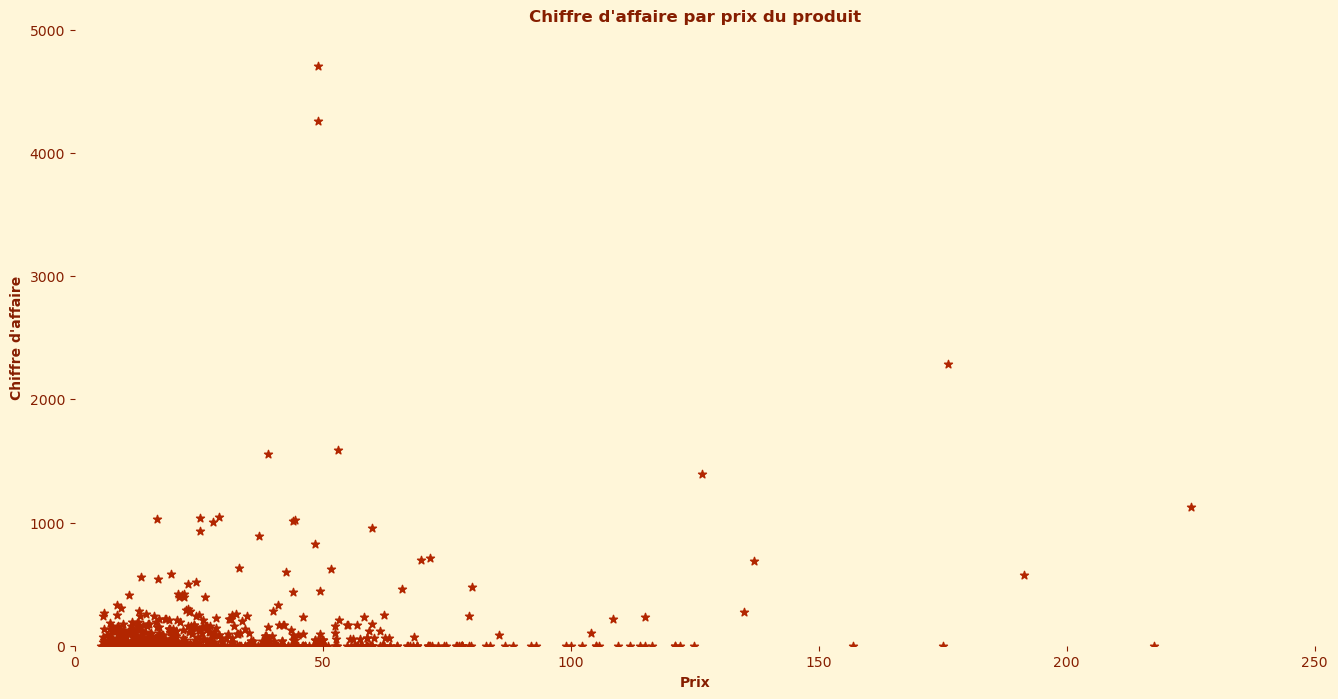

In [30]:
# Graphique en nuage de point plot.figure()
plot.figure(figsize = (16, 8)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.scatter(x = nouvelERP['price'], y = nouvelERP['chiffre_affaire'], color = '#b22600', marker = '*') # Selectionner les données par axe
plot.ylim(0, 5000) # Echelle de Y
plot.xlim(0, 250) # Echelle de X
plot.title("Chiffre d'affaire par prix du produit", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Prix', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.ylabel("Chiffre d'affaire", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show(); 

> ##  <a name="Question02"></a> Chiffre d'Affaire Total
[Table des matières](#Table_des_matières)

In [31]:
# Calculer la somme de la colonne chiffre_affaire
chiffreAffaireTotal = numpy.round(nouvelERP['chiffre_affaire'].sum()/1000,3)
print("le chiffre d'affaire total est de", chiffreAffaireTotal, "K€" )

le chiffre d'affaire total est de 70.569 K€


# <a name="Analyse"> Partie 4 - Analyse Univariée
[Table des matières](#Table_des_matières)

>> ### <a name="AU01"></a>  Methode Z-Score

Selon la formule (x-µ)/σ où

    x=valeur de la cellule
    µ=moyenne
    σ=écart type.

Méthode pour calculer les valeurs aberrantes ou atypiques :
Pour des données supposées normalement distribuées, 95% de celles-ci se situent dans 2 écarts types, et 99.7% dans 3.

In [32]:
nouvelERP['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [33]:
prixMoyen = numpy.round(numpy.mean(nouvelERP['price']),2)
ecartType = numpy.round(numpy.std(nouvelERP['price']),2)
print("Le prix moyen est de", "{:.2f}€".format(prixMoyen), "et l'écart type est de", ecartType)

Le prix moyen est de 32.49€ et l'écart type est de 27.79


In [34]:
# Calcul du Z-score
nouvelERP['z-score'] = (nouvelERP['price'] - prixMoyen) / ecartType
nouvelERP.sort_values(by=["z-score"], ascending=False).head(5)

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,post_name,chiffre_affaire,z-score
200,4352.0,15940,1.0,225.0,0.0,outofstock,5.0,Champagne Egly-Ouriet Grand Cru Millésimé 2008,Issu d’un assemblage de 70% de Pinot Noir du g...,champagne-egly-ouriet-grand-cru-millesime-2008,1125.0,6.927312
434,5001.0,14581,1.0,217.5,20.0,instock,0.0,David Duband Charmes-Chambertin Grand Cru 2014,Robe cerise chatoyante. Un nez de fruits rouge...,david-duband-charmes-chambertin-grand-cru-2014,0.0,6.657431
601,5892.0,14983,1.0,191.3,10.0,instock,3.0,Coteaux Champenois Egly-Ouriet Ambonnay Rouge ...,Cet Ambonnay évoque les grands Pinots Noirs de...,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,573.9,5.714646
219,4402.0,3510,1.0,176.0,8.0,instock,13.0,Cognac Frapin VIP XO,La cuvée VIP XO à été enrichie d’eaux-de-vie t...,cognac-frapin-vip-xo,2288.0,5.164088
566,5767.0,15185,1.0,175.0,12.0,instock,0.0,Camille Giroud Clos de Vougeot 2016,<div>Ce vin provient de vignes âgées de 50 ans...,camille-giroud-clos-de-vougeot-2016,0.0,5.128104


In [35]:
# Filtrer sur les données qui ont un Z-Score > 2
anomalieZscore = nouvelERP.loc[(nouvelERP['z-score'] > 2 ),:]
print("Le fichier contient", anomalieZscore.shape[0], "Lignes et",anomalieZscore.shape[1], "Colonnes" )

Le fichier contient 30 Lignes et 12 Colonnes


In [36]:
# Suppression des colonnes vides (qui ne contiennent pas de données)
listeColonneASupprimer = ['onsale_web', 'stock_quantity', 'stock_status', 'post_excerpt', 'post_name'] 
anomalieZscore = anomalieZscore.drop(listeColonneASupprimer,axis = 1)

In [37]:
# Afficher les anomalies
anomalieZscore = anomalieZscore.sort_values(by=["z-score"], ascending=False)
listeAnomalies = anomalieZscore['price']
print("Il y a", len(listeAnomalies), " anomalies dans la liste des prix")


Il y a 30  anomalies dans la liste des prix


In [38]:
# Affichage de la liste des prix en anomalie
listeAnomalies

200    225.0
434    217.5
601    191.3
219    176.0
566    175.0
222    157.0
387    137.0
661    135.0
202    126.5
524    124.8
617    122.0
676    121.0
673    121.0
667    116.4
675    115.0
672    115.0
618    114.0
447    112.0
229    109.6
220    108.5
666    105.6
440    105.0
439    105.0
223    104.0
386    102.3
63     100.0
674     99.0
616     93.0
514     92.0
65      88.4
Name: price, dtype: float64

In [39]:
#chiffre d'affaire des ces anomalies
chiffreAffaireAnomalieZcore= numpy.round(anomalieZscore['chiffre_affaire'].sum()/1000,2)
partAnomaliesCATotal = numpy.round(chiffreAffaireAnomalieZcore / chiffreAffaireTotal,4)
print("le chiffre d'affaire total est de ces anomalies est de", chiffreAffaireAnomalieZcore, "K€", "soit", "{:.2%}".format(partAnomaliesCATotal), "du CA" ) 

le chiffre d'affaire total est de ces anomalies est de 6.88 K€ soit 9.75% du CA


>> ### <a name="AU02"></a> Methode Interquartile
[Table des matières](#Table_des_matières)
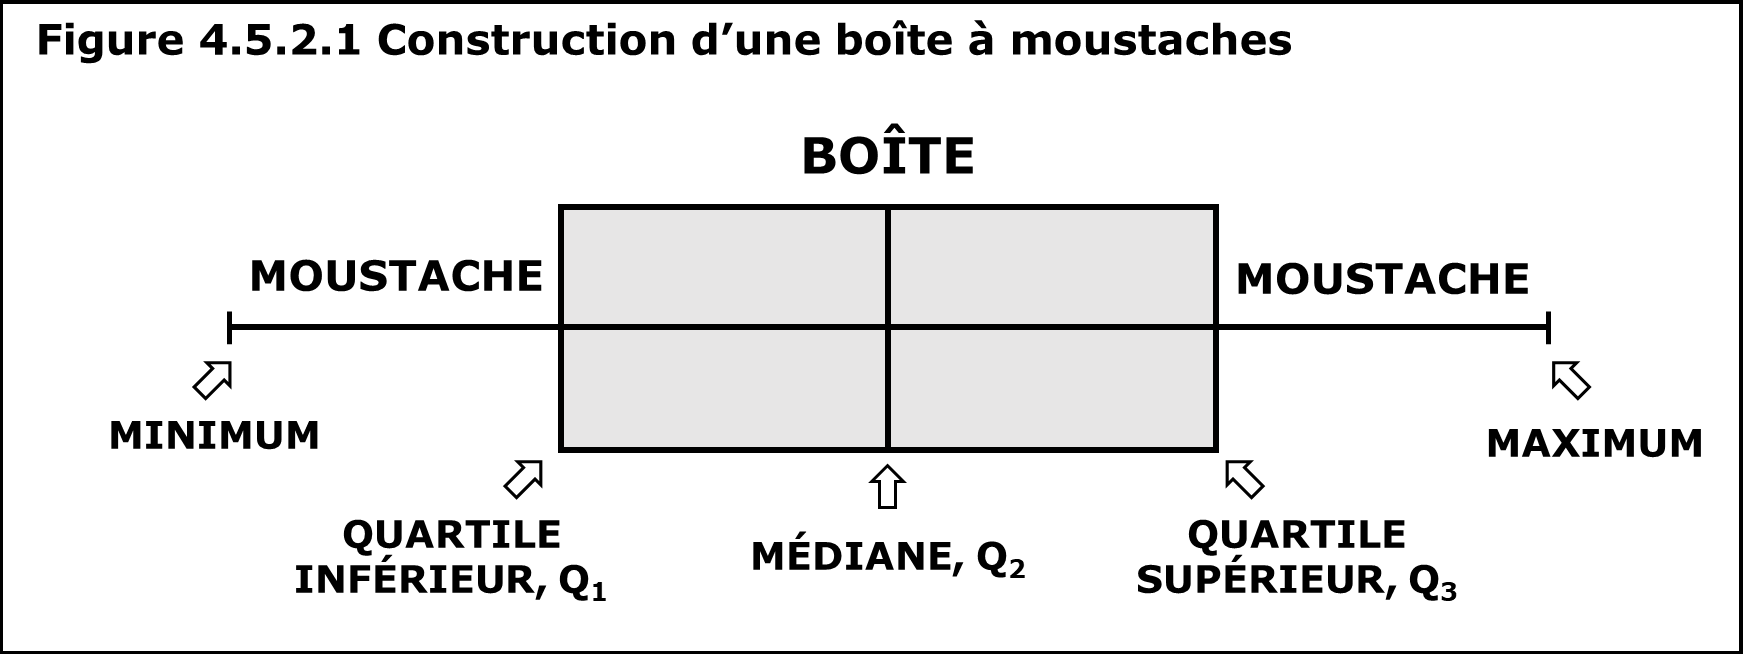

In [40]:
nouvelERP['price'].describe()

count    714.000000
mean      32.493137
std       27.810525
min        5.200000
25%       14.100000
50%       23.550000
75%       42.175000
max      225.000000
Name: price, dtype: float64

In [41]:
# calculer les quartiles
Quartile25pourcent = numpy.round(numpy.quantile(nouvelERP['price'],0.25),2)
Quartile75pourcent = numpy.round(numpy.quantile(nouvelERP['price'],0.75),2)
EcartInterquartille = Quartile75pourcent - Quartile25pourcent
print("Le 1er quartile est de", Quartile25pourcent, "€ et le Le 3ème quartile est de", Quartile75pourcent, "€\n" )
print("l'écart Interquartille est de", EcartInterquartille, "€ et la médiane est de", nouvelERP['price'].median(), "€\n" )
# Calculer la fin de la moustache de droite
moustacheSup = numpy.round(Quartile75pourcent + 1.5 * (Quartile75pourcent- Quartile25pourcent ),2)
moustacheInf = numpy.round(Quartile25pourcent - 1.5 * (Quartile75pourcent- Quartile25pourcent ),2)
print("La valeur de la moustache supérieure est de", moustacheSup, "€\n" )
print("La valeur de la moustache Inférieure est de", moustacheInf,"€\n" )
# Nombre de valeurs en anomalie
anomalies = nouvelERP.loc[nouvelERP['price'] >= moustacheSup ]
prixSansAnomalies = nouvelERP.loc[nouvelERP['price'] < moustacheSup ]
print("il y a", len(anomalies), "prix qui sont au délà du 3ème quartile") #A corriger au délà de la moustache ?


Le 1er quartile est de 14.1 € et le Le 3ème quartile est de 42.18 €

l'écart Interquartille est de 28.08 € et la médiane est de 23.55 €

La valeur de la moustache supérieure est de 84.3 €

La valeur de la moustache Inférieure est de -28.02 €

il y a 32 prix qui sont au délà du 3ème quartile


In [42]:
# Suppression des colonnes inutiles
listeColonneASupprimer = ['onsale_web', 'stock_quantity', 'stock_status', 'post_excerpt', 'post_name'] 
anomalies = anomalies.drop(listeColonneASupprimer,axis = 1)

In [43]:
anomalies = anomalies.sort_values(by=["price"], ascending=False)
listeAnomalies2 = anomalies['price']
print("Il y a", len(listeAnomalies2), "anomalies dans la liste des prix")

Il y a 32 anomalies dans la liste des prix


In [44]:
listeAnomalies2

200    225.0
434    217.5
601    191.3
219    176.0
566    175.0
222    157.0
387    137.0
661    135.0
202    126.5
524    124.8
617    122.0
673    121.0
676    121.0
667    116.4
672    115.0
675    115.0
618    114.0
447    112.0
229    109.6
220    108.5
666    105.6
439    105.0
440    105.0
223    104.0
386    102.3
63     100.0
674     99.0
616     93.0
514     92.0
65      88.4
448     86.8
206     85.6
Name: price, dtype: float64

In [45]:
#chiffre d'affaire des ces anomalies
chiffreAffaireAnomalie= numpy.round(anomalies['chiffre_affaire'].sum()/1000,2)
partAnomaliesCATotal = numpy.round(chiffreAffaireAnomalie / chiffreAffaireTotal,4)
print("le chiffre d'affaire total est de ces anomalies est de", chiffreAffaireAnomalie, "K€", "soit", "{:.2%}".format(partAnomaliesCATotal), "du CA" ) 

le chiffre d'affaire total est de ces anomalies est de 6.97 K€ soit 9.88% du CA


>> ### <a name="AU03"></a> Methode Graphique avec Nuage de point
[Table des matières](#Table_des_matières)

In [46]:
prixSansAnomalies

,product_id,id_web,onsale_web,price,stock_quantity,stock_status,total_sales,post_title,post_excerpt,post_name,chiffre_affaire,z-score
0,3847.0,15298,1.0,24.2,0.0,outofstock,6.0,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",pierre-jean-villa-saint-joseph-preface-2018,145.2,-0.298309
1,3849.0,15296,1.0,34.3,0.0,outofstock,0.0,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,pierre-jean-villa-saint-joseph-tilde-2017,0.0,0.065131
2,3850.0,15300,1.0,20.8,0.0,outofstock,0.0,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",pierre-jean-villa-croze-hermitage-accroche-coe...,0.0,-0.420655
3,4032.0,19814,1.0,14.1,0.0,outofstock,3.0,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,pierre-jean-villa-igp-gamine-2018,42.3,-0.661749
4,4039.0,19815,1.0,46.0,0.0,outofstock,0.0,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,pierre-jean-villa-cote-rotie-carmina-2017,0.0,0.486146
...,...,...,...,...,...,...,...,...,...,...,...,...
728,6930.0,16135,1.0,8.4,83.0,instock,5.0,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,mouthes-le-bihan-aime-chai-2015,42.0,-0.866859
729,7023.0,15891,1.0,27.5,15.0,instock,0.0,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,camin-larredya-jurancon-sec-la-virada-2018,0.0,-0.179561
730,7025.0,15887,1.0,69.0,2.0,instock,0.0,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",jamet-cote-rotie-fructus-voluptas-2018,0.0,1.313782
731,7247.0,13127-1,1.0,54.8,23.0,instock,0.0,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",clos-du-mont-olivet-chateauneuf-du-pape-2007-2,0.0,0.802807


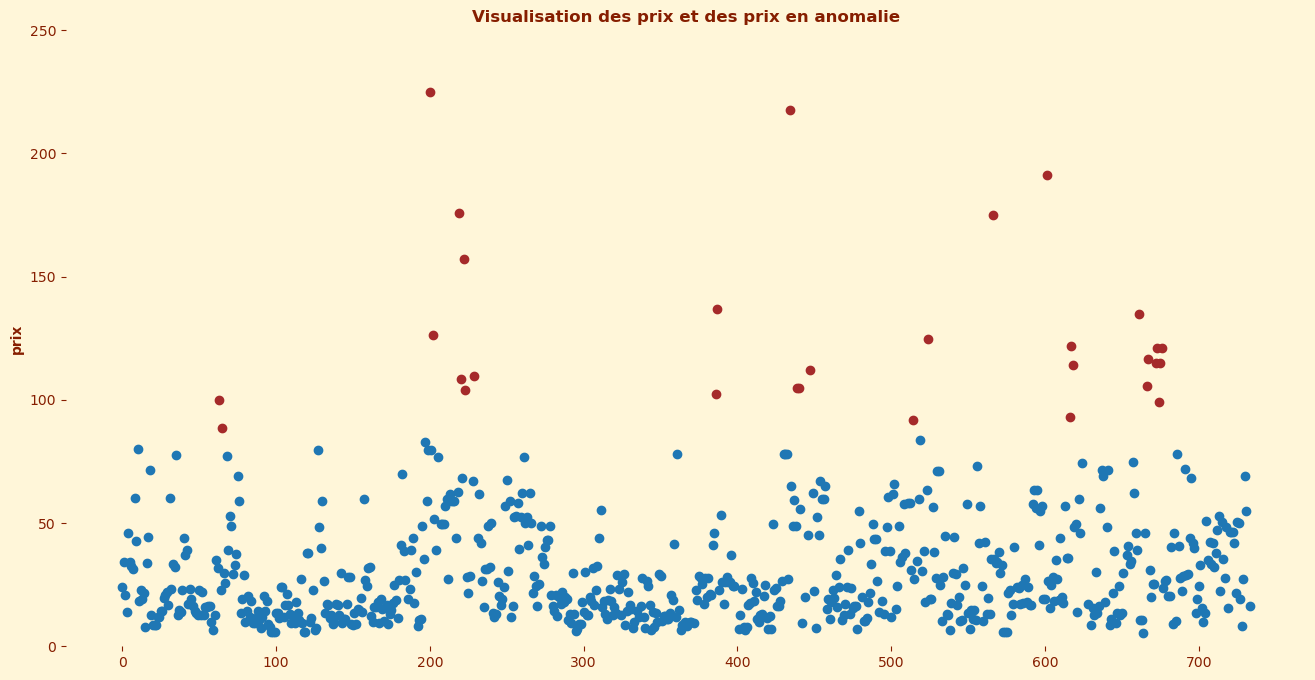

In [47]:
#Graphique en nuage de point plot.figure()
plot.figure(figsize = (16, 8)).patch.set_facecolor('#fff6d9')
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
plot.scatter(prixSansAnomalies['price'].index, prixSansAnomalies['price'].values)
plot.scatter(anomalieZscore['price'].index, anomalieZscore['price'].values, c="brown")
plot.ylim(0, 250) # Echelle de Y
plot.title("Visualisation des prix et des prix en anomalie", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.ylabel("prix", color = '#861e00', fontweight = 'bold') #Titre axe des Y
plot.show()

>> ### <a name="AU04"></a> Methode Graphique avec Boxplot
[Table des matières](#Table_des_matières)

Text(0.5, 0, 'Prix')

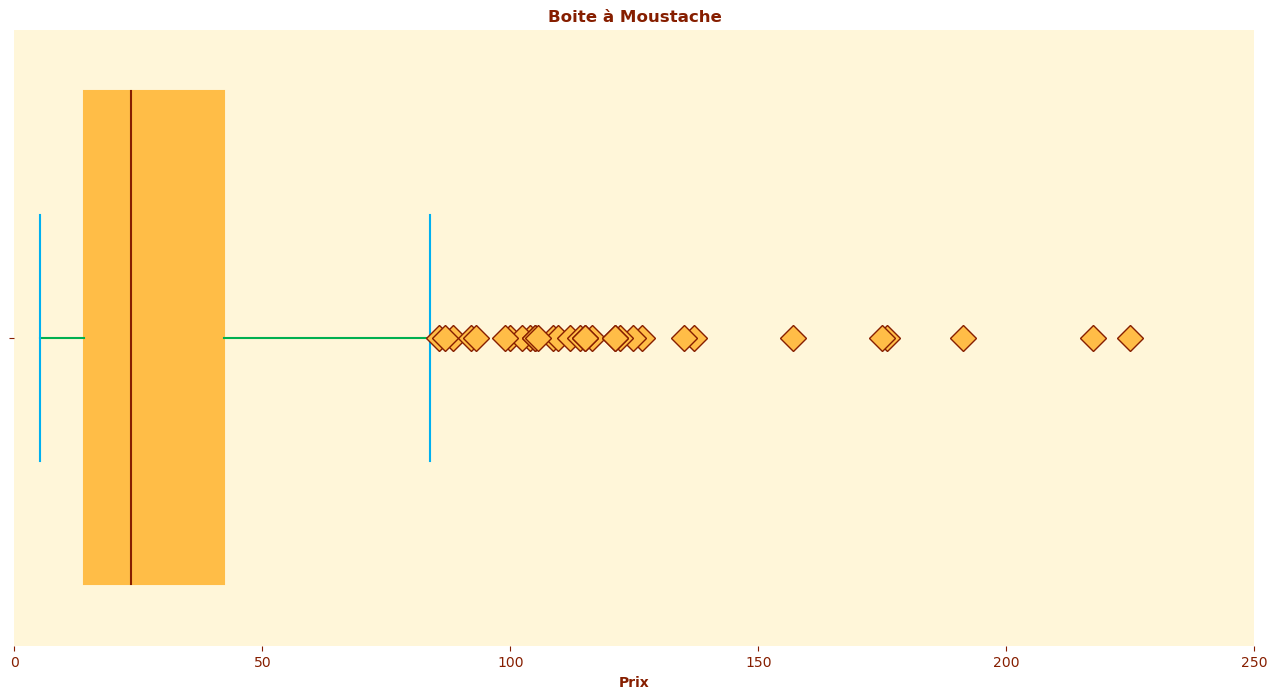

In [48]:
plot.figure(figsize=(16,8))
plot.gca().set_facecolor('#fff6d9') # Couleur de fond
plot.gca().tick_params(colors='#861e00') # changement couleur des axes x et y
plot.gca().spines[:].set_visible(False) # Masquage du cadre noir
sns.boxplot(x= 'price', data=nouvelERP, notch=False , #vert=False,
            boxprops=dict(color="#ffbd47"), #Couleur de fond de la boite
            # couleur des moustaches Verticale et horizontales
            capprops=dict(color="#00b0f0"),whiskerprops=dict(color="#00b050"),  
            medianprops=dict(color="#861e00"), #couleur de la médiane"
            #couleur et taille des marquerus
            flierprops=dict(markerfacecolor="#ffbd47", markeredgecolor="#861e00", marker='D', markersize=13),) 
plot.xlim(0, 250) # Echelle de X
plot.title("Boite à Moustache", color = '#861e00', fontweight = 'bold') # titre du graphique
plot.xlabel('Prix', color = '#861e00', fontweight = 'bold') #Titre axe des X
plot.show()

# <a name="Amadou"></a> Partie 5 - Conclusion
[Table des matières](#Table_des_matières)

In [49]:
print("En regardant les titres en anomalie, on s'aperçoit qu'il s'agit de grand cru ou de grande appellations pour \
les vins et autres spiritueux et il n'a rien de choquant à les voir dans cette catégorie de prix")

En regardant les titres en anomalie, on s'aperçoit qu'il s'agit de grand cru ou de grande appellations pour les vins et autres spiritueux et il n'a rien de choquant à les voir dans cette catégorie de prix


# <a name="Table_des_matières"></a> Partie 5 - Table des matières



##  1. Importation et Nettoyage des Données

[Les Librairies utilisées](#Librairies) : Librairies utilisées

[Fichier ERP](#Fichier01) : Exploration et mise en forme des données du fichier ERP 

[Fichier Web](#Fichier02) : Exploration et mise en forme des données du fichier Web

[Fichier Liaison](#Fichier03) : Exploration et mise en forme des données du fichier Liaison



## 2. Fusion des jeux de données

>[Création Nouveau Dataframe](#Fusion) : Création du nouveau dataframe



## 3. Analyse

>[Question n°01](#Question01) : Chiffre d'Affaire par Produit

>[Question n°02](#Question02) : Chiffre d'Affaire Total


## 4. Analyse Univarié

>[z-Score](#AU01) : Méthode Z-score

>[Interquartilles](#AU02) : Méthode des interquartilles

>[Nuage de Points](#AU03) : Méthode Graphique avec un nuage de points

>[Boite à Moustaches ](#AU04) : Méthode Graphique avec une boite à Moustache




## 5. Conclusion

>[Conclusion](#Amadou) : Les prix sont-ils abérrants ?


[Table des matières](#Table_des_matières)
